In [1]:
from elo import set_elo_df, set_tilts
from elo_update import update_elo_with_fixtures
from fetch_elo import fetch_elo_data
from fixtures import compute_initial_tilts, get_fixtures
from simulation import simulate_match, simulate_season, build_season_summary
from table import build_league_table
from simulation_analysis import (
    create_comprehensive_table, 
    display_comprehensive_analysis,
    create_dashboard_figures,
    create_season_dashboard,
    create_social_media_chart
)

/Users/thorjan/git/elo/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Load data

In [2]:
fixtures = get_fixtures(force_refresh=False)  # Set to True to force refresh from API
elo = fetch_elo_data(force_refresh=False)  # Set to True to force refresh from ClubELO API
set_elo_df(elo) # Set the elo_df globally for Club class
tilts = compute_initial_tilts(fixtures)
set_tilts(tilts)  # Set the tilts globally for Club class

Loading fixtures from cache: fixtures.parquet
Loading ELO data from cache: elo_latest.parquet


Update ELO for missing matches

In [3]:
elo = update_elo_with_fixtures(elo, fixtures, tilts=tilts)
set_elo_df(elo) # Set the elo_df globally for Club class

10 teams had their ELO updated.


# Current standings

In [10]:
build_league_table(fixtures.loc[fixtures.season == 2025])

,Position,Team,Games,Wins,Draws,Losses,Goals,GD,Points,GF,GA
0,1,Bodø/Glimt,19,13,3,3,49-17,+32,42,49,17
1,2,Viking,19,13,3,3,47-26,+21,42,47,26
2,3,Brann,18,11,3,4,33-26,+7,36,33,26
3,4,Tromsø,19,10,3,6,30-27,+3,33,30,27
4,5,Rosenborg,18,8,6,4,24-21,+3,30,24,21
5,6,Sandefjord,18,9,1,8,35-26,+9,28,35,26
6,7,KFUM Oslo,19,7,6,6,31-22,+9,27,31,22
7,8,Molde,19,8,3,8,27-23,+4,27,27,23
8,9,Vålerenga,19,8,3,8,31-30,+1,27,31,30
9,10,Fredrikstad,18,7,5,6,23-20,+3,26,23,20


# Simulation

In [4]:
iterations = 50

stats_tracker_season, position_counts_season = simulate_season(fixtures, n_simulations=iterations)
table_mean_season, position_probs_season = build_season_summary(stats_tracker_season, position_counts_season, use_median=False)
table_median_season, _ = build_season_summary(stats_tracker_season, position_counts_season, use_median=True)

150 games have been played. Starting 50 simulations of 90 games.


Simulating seasons:   0%|          | 0/50 [00:00<?, ?it/s]

Mean

In [ ]:
display(table_mean_season)
display(position_probs_season)

Median

In [ ]:
display(table_median_season)

# Visualization

## Dashboard Charts
The visualization creates two key charts perfect for social media:

1. **Current vs Expected Position** (Left): Shows how many positions each team is above/below their ELO expectation
   - 🟢 Green bars = performing better than ELO predicts  
   - 🔴 Red bars = performing worse than ELO predicts
   - ⚫ Gray bars = performing exactly as expected

2. **Position Uncertainty** (Right): Shows prediction confidence for each team's final position
   - 🔴 Red = high uncertainty (unpredictable outcome)
   - 🟠 Orange = medium uncertainty  
   - 🟢 Green = low uncertainty (predictable outcome)

In [ ]:
# Create all dashboard figures using the simulation analysis module
current_table = build_league_table(fixtures.loc[fixtures.season == 2025])

# Create all figures at once
figures = create_dashboard_figures(
    table_mean_season, 
    position_probs_season, 
    stats_tracker_season, 
    current_table, 
    elo
)

print("Dashboard figures created successfully!")
print("Available figures:")
print("- figures['dashboard']: Main 2-panel dashboard")
print("- figures['social_media']: Social media optimized version") 
print("- figures['position_comparison']: Just the position comparison chart")
print("- figures['uncertainty']: Just the uncertainty chart")

# Summary Table

Complete overview with probabilities and performance metrics:

🔄 Fetching logos from Football API...
🔄 Fetching logos from Football API...
Found logo for Brann: https://media.api-sports.io/football/teams/319.png
Found logo for Kristiansund: https://media.api-sports.io/football/teams/320.png
Found logo for Strømsgodset: https://media.api-sports.io/football/teams/324.png
Found logo for Tromsø: https://media.api-sports.io/football/teams/325.png
Found logo for Vålerenga: https://media.api-sports.io/football/teams/326.png
Found logo for Bodø/Glimt: https://media.api-sports.io/football/teams/327.png
Found logo for Haugesund: https://media.api-sports.io/football/teams/328.png
Found logo for Molde: https://media.api-sports.io/football/teams/329.png
Found logo for Rosenborg: https://media.api-sports.io/football/teams/331.png
Found logo for Sandefjord: https://media.api-sports.io/football/teams/332.png
Found logo for Sarpsborg 08: https://media.api-sports.io/football/teams/333.png
Found logo for Viking: https://media.api-sports.io/football/teams/759.png
Fou

Plass,Lag,Nåværende ELO,Forventede poeng,Vinner (%),CL (%),Europa League (%),Conference League (%),Nedrykk (%),Posisjon diff,Usikkerhet
1,Bodø/Glimt,1646,69.3,80.0,100.0,100.0,100.0,0.0,0,2.80
2,Viking,1527,65.3,18.0,84.0,100.0,100.0,0.0,0,3.81
3,Brann,1513,58.8,2.0,14.0,82.0,98.0,0.0,0,3.85
4,Tromsø,1426,52.2,0.0,2.0,8.0,48.0,0.0,2,3.74
5,Rosenborg,1478,51.5,0.0,0.0,8.0,46.0,0.0,-1,4.31
6,Molde,1461,44.9,0.0,0.0,0.0,2.0,0.0,-1,4.60
7,Sandefjord,1383,44.5,0.0,0.0,2.0,4.0,0.0,2,4.36
8,KFUM Oslo,1391,40.8,0.0,0.0,0.0,0.0,0.0,0,4.07
9,Fredrikstad,1392,40.2,0.0,0.0,0.0,2.0,0.0,-2,4.99
10,Vålerenga,1349,38.3,0.0,0.0,0.0,0.0,0.0,1,3.09

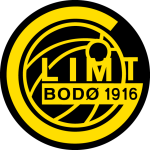
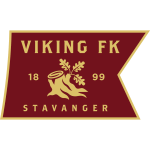
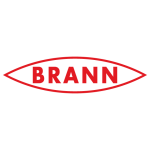
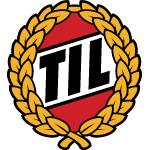
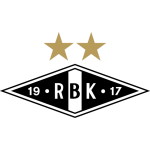
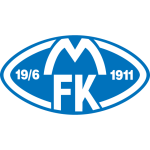
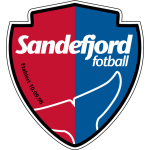
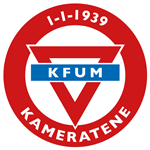
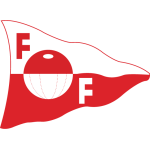
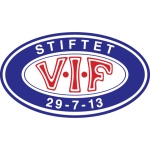
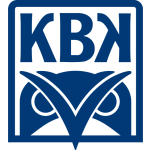
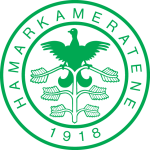
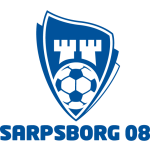
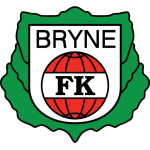
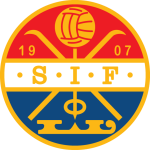
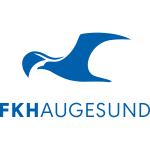

- Posisjon diff: ELO-rangering vs forventet sluttposisjon (positivt = bedre enn ELO)
- Usikkerhet: Standardavvik av simulerte sluttpoeng


In [ ]:
# 🏆 COMPREHENSIVE TABLE WITH CLUB LOGOS 🏆
# Set fetch_logos=True to download logos from Football API (only needed once)
fetch_logos = False  # Change to True to fetch/refresh logos

import importlib
import simulation_analysis
importlib.reload(simulation_analysis)
from simulation_analysis import create_comprehensive_table, display_comprehensive_analysis

# Create current table (needed for comparison)
current_table = build_league_table(fixtures.loc[fixtures.season == 2025])

# Create the comprehensive table
comprehensive_table = create_comprehensive_table(
    table_mean_season, 
    position_probs_season, 
    stats_tracker_season, 
    current_table, 
    elo
)

if fetch_logos:
    print("🔄 Fetching logos from Football API...")
else:
    print("📊 Using existing logos...")

# Display the table with logos (will skip download if fetch_logos=False)
display_comprehensive_analysis(comprehensive_table, iterations, fetch_logos=fetch_logos)

# Playground

In [ ]:
fixtures.loc[
    ((fixtures['home'] == 'Sandefjord') & (fixtures['away'] == 'Viking')) & (fixtures['season'] == 2025)
]

In [ ]:
fixtures.loc[fixtures['id'] == 1342321, 'status'] = 'NS'

In [ ]:
fixtures.loc[((fixtures['home'] == 'Viking') | (fixtures['away'] == 'Viking')) & (fixtures['season'] == 2025)]